# Forest Cover Classification Using Logistic Regression

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Reading the dataset
data_set = pd.read_csv('train.csv')
data_set.shape

(2000, 21)

In [3]:
# Checking for null values in the dataset
data_set.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
# Separating the input features and target variable
X = data_set.iloc[:, :-1]
y = data_set['price_range']

In [5]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((1600, 20), (400, 20))

In [6]:
# Scaling the features in the training and test sets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Finding the Best Parameters Using Halving Grid Search

In [7]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.linear_model import LogisticRegression

In [13]:
# Defining the parameter grid
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],      
    'penalty': ['l1', 'l2','elasticnet'],             
    'solver': ['lbfgs'],     
    'max_iter': [250, 500],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5]
}

In [14]:
halving_search = HalvingGridSearchCV(estimator=LogisticRegression(random_state=0),
                                     param_grid=param_grid,
                                     cv=5,
                                     factor=4,  
                                     n_jobs=-1,
                                     verbose=3)

halving_search.fit(X_train, y_train)

n_iterations: 3
n_required_iterations: 4
n_possible_iterations: 3
min_resources_: 40
max_resources_: 1600
aggressive_elimination: False
factor: 4
----------
iter: 0
n_candidates: 240
n_resources: 40
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


d:\Python\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
800 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Python\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
     

----------
iter: 1
n_candidates: 60
n_resources: 160
Fitting 5 folds for each of 60 candidates, totalling 300 fits
----------
iter: 2
n_candidates: 15
n_resources: 640
Fitting 5 folds for each of 15 candidates, totalling 75 fits


d:\Python\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [    nan 0.35        nan     nan 0.35        nan     nan 0.35        nan
     nan 0.35        nan     nan 0.35        nan     nan 0.35        nan
     nan 0.35        nan     nan 0.35        nan     nan 0.35        nan
     nan 0.35        nan     nan 0.35        nan     nan 0.35        nan
     nan 0.35        nan     nan 0.35        nan     nan 0.35        nan
     nan 0.35        nan     nan 0.35        nan     nan 0.35        nan
     nan 0.35        nan     nan 0.35        nan     nan 0.4         nan
     nan 0.4         nan     nan 0.4         nan     nan 0.4         nan
     nan 0.4         nan     nan 0.4         nan     nan 0.4         nan
     nan 0.4         nan     nan 0.4         nan     nan 0.4         nan
     nan 0.475       nan     nan 0.475       nan     nan 0.475       nan
     nan 0.475       nan     nan 0.475       nan     nan 0.475      

HalvingGridSearchCV(estimator=LogisticRegression(random_state=0), factor=4,
                    n_jobs=-1,
                    param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                      1000],
                                'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5],
                                'max_iter': [250, 500],
                                'penalty': ['l1', 'l2', 'elasticnet'],
                                'solver': ['lbfgs']},
                    verbose=3)

In [16]:
# Best parameters found by HalvingGridSearchCV
print('Best score:',halving_search.best_score_)
print('Best parameters found:',halving_search.best_params_)

Best score: 0.9484375
Best parameters found: {'C': 100, 'l1_ratio': 0.4, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}


### Visualizing the Results

In [18]:
results = pd.DataFrame(halving_search.cv_results_)

sorted_indices = np.argsort(results['mean_test_score'])[::-1]
sorted_scores = results['mean_test_score'].values[sorted_indices]
sorted_params = results['params'].values[sorted_indices]

top_params = [str(params) for params in sorted_params[:10]]
top_scores = [str(sc) for sc in sorted_scores[:10]]
param_lb = []
for i in range(1,11):
    param_lb.append('Parameter Combination ' + str(i))

print('Top 10 Parameter Combinations:')
for i in range(len(top_params)):
    print('Parmeter Combination',i+1)
    print(top_params[i])
    print('Score:',top_scores[i])
    print()

Top 10 Parameter Combinations:
Parmeter Combination 1
{'C': 10, 'l1_ratio': 0.1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Score: 0.475

Parmeter Combination 2
{'C': 10, 'l1_ratio': 0.1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'lbfgs'}
Score: nan

Parmeter Combination 3
{'C': 10, 'l1_ratio': 0.1, 'max_iter': 250, 'penalty': 'l1', 'solver': 'lbfgs'}
Score: nan

Parmeter Combination 4
{'C': 1, 'l1_ratio': 0.5, 'max_iter': 250, 'penalty': 'l2', 'solver': 'lbfgs'}
Score: 0.475

Parmeter Combination 5
{'C': 1, 'l1_ratio': 0.5, 'max_iter': 500, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
Score: nan

Parmeter Combination 6
{'C': 1, 'l1_ratio': 0.5, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Score: 0.475

Parmeter Combination 7
{'C': 1, 'l1_ratio': 0.5, 'max_iter': 500, 'penalty': 'l1', 'solver': 'lbfgs'}
Score: nan

Parmeter Combination 8
{'C': 1, 'l1_ratio': 0.5, 'max_iter': 250, 'penalty': 'l1', 'solver': 'lbfgs'}
Score: nan

Parmeter Combination 9
{'C': 1, 'l1_rati

d:\Python\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)


## Designing the Logistic Regression Model with the Optimal Hyperparameters

In [19]:
best_lgrg_clf = halving_search.best_estimator_

# Making predictions with the best estimator
y_train_pred = best_lgrg_clf.predict(X_train) # type: ignore
y_test_pred = best_lgrg_clf.predict(X_test) # type: ignore

In [21]:
# Computing the performance metrics for the training subset
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Training Accuracy (in %):",round(train_accuracy*100,3))
print("Training Precision (in %):",round(train_precision*100,3)) # type: ignore
print("Training Recall (in %):",round(train_recall*100,3)) # type: ignore
print("Training F1 Score (in %):",round(train_f1*100,3)) # type: ignore

Training Accuracy (in %): 98.938
Training Precision (in %): 98.938
Training Recall (in %): 98.938
Training F1 Score (in %): 98.937


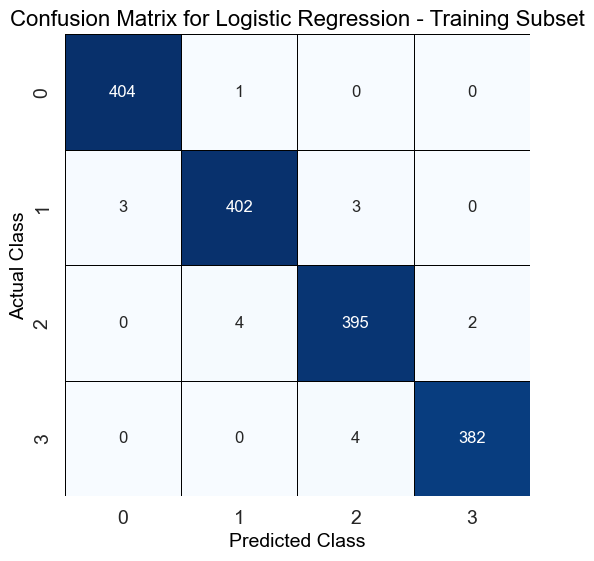

In [22]:
conf_mat_train = confusion_matrix(y_train,y_train_pred)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_train, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=best_lgrg_clf.classes_, yticklabels=best_lgrg_clf.classes_, annot_kws={"size": 12}) # type: ignore
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Logistic Regression - Training Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

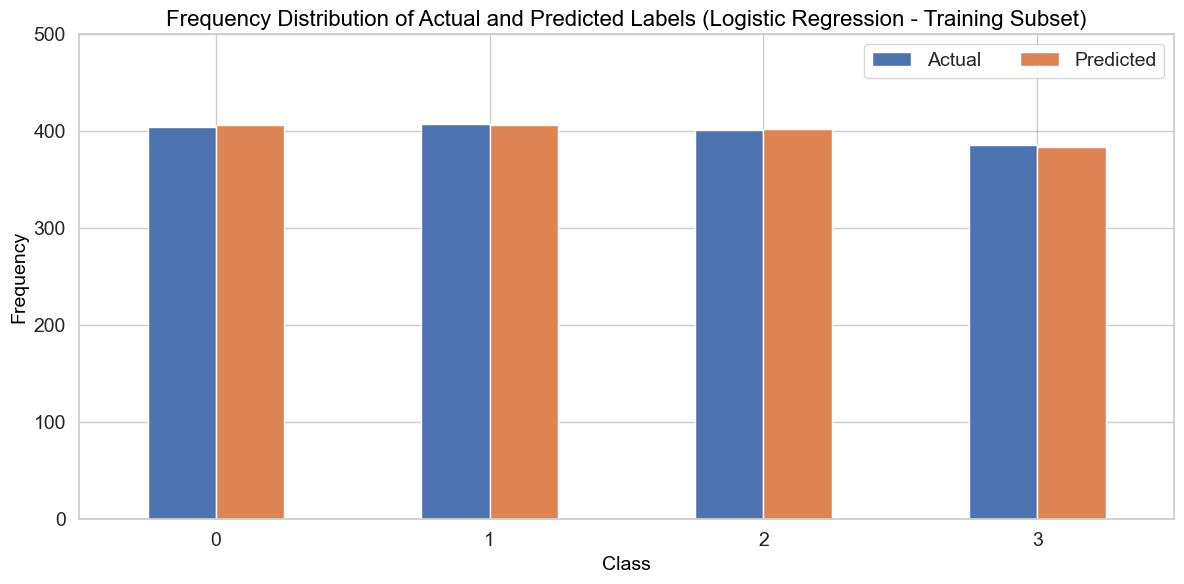

In [23]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_train, actual_counts_train = np.unique(y_train, return_counts=True)
predicted_labels_train, predicted_counts_train = np.unique(y_train_pred, return_counts=True)

labels_train = np.unique(y_train)

x_train = np.arange(len(labels_train))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_train = ax.bar(x_train - width/2, actual_counts_train, width, label='Actual')
rects2_train = ax.bar(x_train + width/2, predicted_counts_train, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Logistic Regression - Training Subset)', color='black', fontsize=16)
ax.set_xticks(x_train)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_train) - 0.5]) # type: ignore
ax.set_ylim([0,500]) # type: ignore
fig.tight_layout()
plt.show()

In [25]:
# Computing the performance metrics for the test subset
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Test Accuracy (in %):",round(test_accuracy*100,3))
print("Test Precision (in %):",round(test_precision*100,3)) # type: ignore
print("Test Recall (in %):",round(test_recall*100,3)) # type: ignore
print("Test F1 Score (in %):",round(test_f1*100,3)) # type: ignore

Test Accuracy (in %): 96.75
Test Precision (in %): 96.778
Test Recall (in %): 96.75
Test F1 Score (in %): 96.742


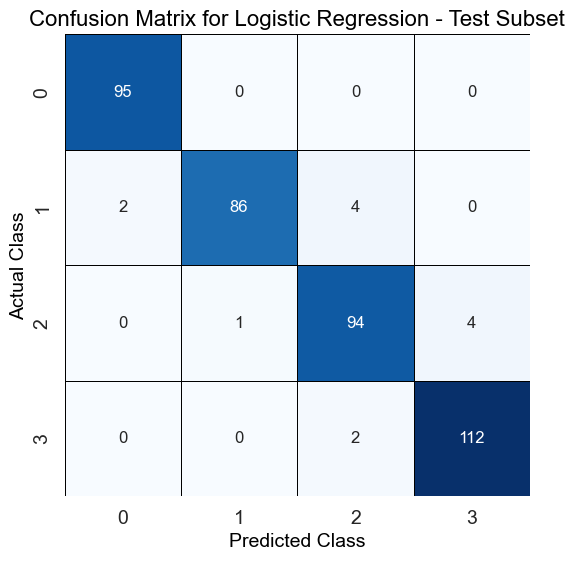

In [26]:
conf_mat_test = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=best_lgrg_clf.classes_, yticklabels=best_lgrg_clf.classes_, annot_kws={"size": 12}) # type: ignore
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Logistic Regression - Test Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

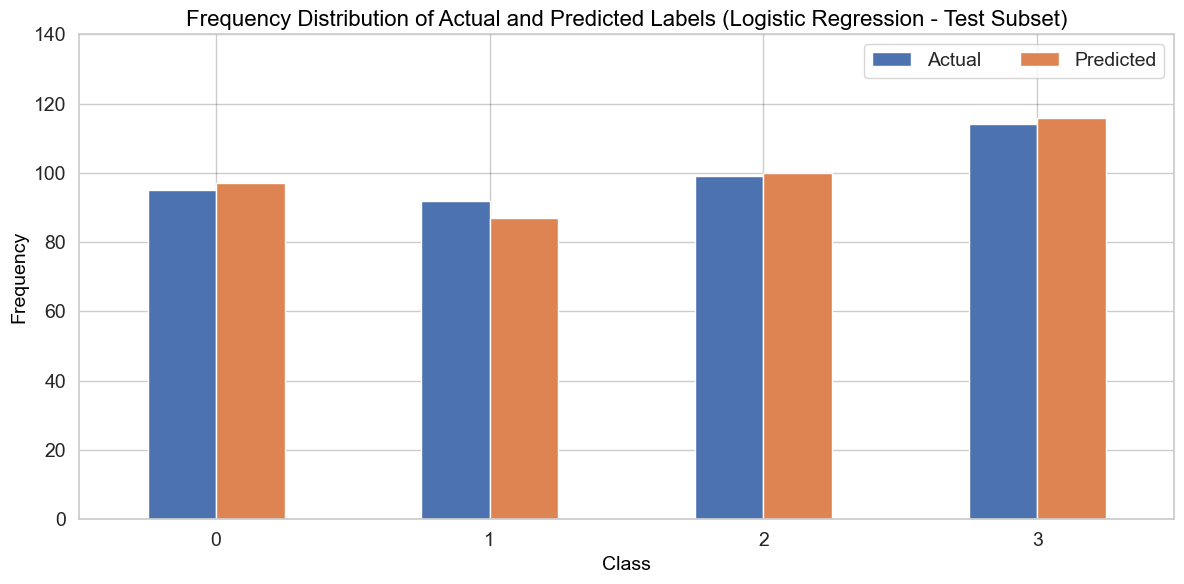

In [27]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test, predicted_counts_test = np.unique(y_test_pred, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Logistic Regression - Test Subset)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) # type: ignore
ax.set_ylim([0,140]) # type: ignore
fig.tight_layout()
plt.show()

In [28]:
import joblib

# Saving the model
joblib.dump(best_lgrg_clf, 'LogisticRegression_MobilePrice.pkl')

['LogisticRegression_MobilePrice.pkl']

***